In [ ]:
avant tout : voir les parties aberrantes en terme de durée, golds, kills.



l'histoire 0 commence avec : si je me retrouve dans un matchup qui a déjà existé pleins de fois, j'ai une stat. le meme affrontement n'arrive pas plus d'une fois. donc on analyse les compositions d'équipes :
l'histoire commence  avec "si telle equipe est pick, je gagne donc on commence par analyser les 5v5 qui apparaissent le plus.'
''

(si on a plus que 20 000games :)
voir si les compositions sont équitablement réparties : ca ne sert à rien de mesurer les winrates des compos si on n'a pas au moins 10 parties de 10 compos?
dans les compositions qui sont picks plusieurs fois quel est le winrate et contre quel matchup ?

on a peu d'occurrences. regardons donc les champions 
'voir les meilleurs winrates pour top'
puis les synergies : paires et trios
puis 1c1, puis 1c2, puis 2c2 / 1c3 ?
donc : faire donc des stats par champions car les nombres sur les compositions sont faibles
Demander à Guilhem
- les 3 x 3 colonnes (pickrate, winrate brut et (en resizé le winrate)) en global, par équipe. pour voir les meilleurs winrates ordonnés par winrates, les meilleurs pickrates ordnns par winrate)
- pires winrates les plus picks , et parmis les plus picks, qui a les pires winrates


puis à quel point le déroulé de la game l'influence-t-elle comparé à la draft ? 
gold/team en fonction de l'équipe qui win
qui win en fonction de la durée de la game, est-ce que c'est parce qu'ils ont plus souvennt des compos "early"?
correlations gold, kills, turret pour voir lesquelles de ces variables sont tres correlées entre elles
moyenne des durées de game en fonction de qui win
win compo early
win compo late

puis à quel point la draft est liée au déroulé de la game ?

analyses inter invocateurs

In [1]:
# Import des librairies

import pandas as pd
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

pd.set_option('display.max_info_columns', 10000)
pd.set_option('display.max_info_rows', 10000)




In [3]:
# importe, enleve les lignes où il y a des nulls
df = pd.read_csv("C:\\Users\\samue\\Documents\\datascientest-lol-draft_analyzer\\src\\samuel\\lol_matches_export.csv")

In [4]:
# Vérifie les doublons exacts de lignes dans le DataFrame
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {nb_doublons}")

Nombre de doublons dans le DataFrame : 0


In [11]:
list(df.columns)

['match_id',
 'game_duration',
 'game_version',
 'team_100_win',
 'team_100_early_surrendered',
 'team_200_early_surrendered',
 'team_100_first_blood',
 'team_100_first_tower',
 'team_100_first_inhibitor',
 'team_100_first_dragon',
 'team_100_first_rift_herald',
 'team_100_first_baron',
 'team_100_dragon_kills',
 'team_100_baron_kills',
 'team_100_tower_kills',
 'team_100_inhibitor_kills',
 'team_100_rift_herald_kills',
 'team_100_ban_1',
 'team_100_ban_2',
 'team_100_ban_3',
 'team_100_ban_4',
 'team_100_ban_5',
 'team_200_first_blood',
 'team_200_first_tower',
 'team_200_first_inhibitor',
 'team_200_first_dragon',
 'team_200_first_rift_herald',
 'team_200_first_baron',
 'team_200_dragon_kills',
 'team_200_baron_kills',
 'team_200_tower_kills',
 'team_200_inhibitor_kills',
 'team_200_rift_herald_kills',
 'team_200_ban_1',
 'team_200_ban_2',
 'team_200_ban_3',
 'team_200_ban_4',
 'team_200_ban_5',
 'team_100_top_champion_id',
 'team_100_top_champion_name',
 'team_100_top_kills',
 'team

In [6]:
df.head()

match_id  game_duration    game_version  team_100_win  \
0  EUW1_7517331727           1718  15.17.708.5788             0   
1  EUW1_7509322616           1709  15.17.706.7412             0   
2  EUW1_7509243675           1543  15.17.706.7412             0   
3  EUW1_7509193063           1146  15.17.706.7412             0   
4  EUW1_7508909082           1555  15.17.706.7412             0   

   team_100_early_surrendered  team_200_early_surrendered  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   team_100_first_blood  team_100_first_tower  team_100_first_inhibitor  \
0                     1                     0                         0   
1                     0                     1                         0   
2                     0                     1                         0   
3                     0                     1                         0   
4                     1                     0                         0   

   team_100_first_dragon  team_100_first_rift_herald  team_100_first_baron  \
0                      0                           1                     0   
1                      0                           0                     0   
2                      0                           0                     0   
3                      0                           0                     0   
4                      0                           0                     0   

   team_100_dragon_kills  team_100_baron_kills  team_100_tower_kills  \
0                      0                     0                     3   
1                      0                     0                     3   
2                      0                     0                     1   
3                      0                     0                     1   
4                      0                     0                     2   

   team_100_inhibitor_kills  team_100_rift_herald_kills  team_100_ban_1  \
0                         0                           1             117   
1                         0                           0             804   
2                         0                           0              36   
3                         0                           0              15   
4                         0                           0             119   

   team_100_ban_2  team_100_ban_3  team_100_ban_4  team_100_ban_5  \
0             114             107             711              78   
1             555             887              10             901   
2             107             114              11             157   
3             246             950             119              29   
4              38              35             103             235   

   team_200_first_blood  team_200_first_tower  team_200_first_inhibitor  \
0                     0                     1                         1   
1                     1                     0                         1   
2                     1                     0                         1   
3                     1                     0                         0   
4                     0                     1                         1   

   team_200_first_dragon  team_200_first_rift_herald  team_200_first_baron  \
0                      1                           0                     1   
1                      1                           1                     1   
2                      1                           1                     0   
3                      1                           1                     0   
4                      1                           1                     0   

   team_200_dragon_kills  team_200_baron_kills  team_200_tower_kills  \
0                      4     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20246 entries, 0 to 20245
Data columns (total 138 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    match_id                        object 
 1    game_duration                   int64  
 2    game_version                    object 
 3    team_100_win                    int64  
 4    team_100_early_surrendered      int64  
 5    team_200_early_surrendered      int64  
 6    team_100_first_blood            int64  
 7    team_100_first_tower            int64  
 8    team_100_first_inhibitor        int64  
 9    team_100_first_dragon           int64  
 10   team_100_first_rift_herald      int64  
 11   team_100_first_baron            int64  
 12   team_100_dragon_kills           int64  
 13   team_100_baron_kills            int64  
 14   team_100_tower_kills            int64  
 15   team_100_inhibitor_kills        int64  
 16   team_100_rift_herald_kills      int64  
 17   team_100_b

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]



team_100_top_champion_id           3
team_100_top_champion_name         3
team_100_top_kills                 3
team_100_top_deaths                3
team_100_top_assists               3
team_100_top_gold                  3
team_100_top_cs                    3
team_100_top_vision                3
team_100_top_damage                3
team_100_top_kda                   3
team_100_jungle_champion_id       12
team_100_jungle_champion_name     12
team_100_jungle_kills             12
team_100_jungle_deaths            12
team_100_jungle_assists           12
team_100_jungle_gold              12
team_100_jungle_cs                12
team_100_jungle_vision            12
team_100_jungle_damage            12
team_100_jungle_kda               12
team_100_mid_champion_id           6
team_100_mid_champion_name         6
team_100_mid_kills                 6
team_100_mid_deaths                6
team_100_mid_assists               6
team_100_mid_gold                  6
team_100_mid_cs                    6
t

In [19]:
df.isnull().sum().filter(regex='champion_name')



team_100_top_champion_name         3
team_100_jungle_champion_name     12
team_100_mid_champion_name         6
team_100_adc_champion_name        11
team_100_support_champion_name     8
team_200_top_champion_name        15
team_200_jungle_champion_name      4
team_200_mid_champion_name         9
team_200_adc_champion_name         7
team_200_support_champion_name     6
dtype: int64

In [20]:
df.shape

(20246, 138)

In [22]:
cols = df.filter(regex='champion_name').columns
df_clean = df.dropna(subset=cols)
df_clean.shape

(20167, 138)

In [ ]:
#drop colonnes
cols_to_drop = ['match_id', 'game_duration', 'team_100_early_surrendered', 'team_200_early_surrendered', 'team_100_first_blood', 'team_100_first_tower', 'team_100_first_inhibitor', 'team_100_first_dragon', 
'team_100_first_rift_herald', 'team_100_first_baron', 'team_100_dragon_kills', 'team_100_baron_kills', 'team_100_tower_kills', 'team_100_inhibitor_kills', 'team_100_rift_herald_kills', 'team_200_first_blood', 'team_200_first_tower', 
'team_200_first_inhibitor', 'team_200_first_dragon', 'team_200_first_rift_herald', 'team_200_first_baron', 'team_200_dragon_kills', 'team_200_baron_kills', 'team_200_tower_kills', 'team_200_inhibitor_kills', 'team_200_rift_herald_kills',
'team_100_top_champion_id', 'team_100_top_kills','team_100_top_deaths', 'team_100_top_assists', 'team_100_top_gold', 'team_100_top_cs', 'team_100_top_vision', 'team_100_top_damage', 'team_100_top_kda',
'team_100_jungle_champion_id', 'team_100_jungle_kills', 'team_100_jungle_deaths', 'team_100_jungle_assists', 'team_100_jungle_gold', 'team_100_jungle_cs', 'team_100_jungle_vision', 'team_100_jungle_damage', 'team_100_jungle_kda', 'team_100_mid_champion_id', 'team_100_mid_kills', 
'team_100_mid_deaths', 'team_100_mid_assists', 'team_100_mid_gold', 'team_100_mid_cs', 'team_100_mid_vision', 'team_100_mid_damage', 'team_100_mid_kda', 'team_100_adc_champion_id', 'team_100_adc_kills', 
'team_100_adc_deaths', 'team_100_adc_assists', 'team_100_adc_gold', 'team_100_adc_cs', 'team_100_adc_vision', 'team_100_adc_damage', 'team_100_adc_kda', 'team_100_support_champion_id', 'team_100_support_kills', 
'team_100_support_deaths', 'team_100_support_assists', 'team_100_support_gold', 'team_100_support_cs', 'team_100_support_vision', 'team_100_support_damage', 'team_100_support_kda', 'team_200_top_champion_id', 
'team_200_top_kills', 'team_200_top_deaths', 'team_200_top_assists', 'team_200_top_gold', 'team_200_top_cs', 'team_200_top_vision', 'team_200_top_damage', 'team_200_top_kda', 'team_200_jungle_champion_id', 
'team_200_jungle_kills', 'team_200_jungle_deaths', 'team_200_jungle_assists', 'team_200_jungle_gold', 'team_200_jungle_cs', 'team_200_jungle_vision', 'team_200_jungle_damage', 'team_200_jungle_kda',
'team_200_mid_champion_id', 'team_200_mid_kills', 'team_200_mid_deaths', 'team_200_mid_assists', 'team_200_mid_gold', 'team_200_mid_cs', 'team_200_mid_vision', 'team_200_mid_damage', 'team_200_mid_kda',
'team_200_adc_champion_id', 'team_200_adc_kills', 'team_200_adc_deaths', 'team_200_adc_assists', 'team_200_adc_gold', 'team_200_adc_cs', 'team_200_adc_vision', 'team_200_adc_damage', 'team_200_adc_kda', 
'team_200_support_champion_id', 'team_200_support_kills', 'team_200_support_deaths', 'team_200_support_assists', 'team_200_support_gold', 'team_200_support_cs', 'team_200_support_vision', 'team_200_support_damage', 'team_200_support_kda']

# Supprimer les colonnes
df_clean = df_clean.drop(columns=cols_to_drop)

In [26]:
df_clean.columns.to_list()


['match_id',
 'game_duration',
 'game_version',
 'team_100_win',
 'team_100_early_surrendered',
 'team_200_early_surrendered',
 'team_100_first_blood',
 'team_100_first_tower',
 'team_100_first_inhibitor',
 'team_100_first_dragon',
 'team_100_first_rift_herald',
 'team_100_first_baron',
 'team_100_dragon_kills',
 'team_100_baron_kills',
 'team_100_tower_kills',
 'team_100_inhibitor_kills',
 'team_100_rift_herald_kills',
 'team_100_ban_1',
 'team_100_ban_2',
 'team_100_ban_3',
 'team_100_ban_4',
 'team_100_ban_5',
 'team_200_first_blood',
 'team_200_first_tower',
 'team_200_first_inhibitor',
 'team_200_first_dragon',
 'team_200_first_rift_herald',
 'team_200_first_baron',
 'team_200_dragon_kills',
 'team_200_baron_kills',
 'team_200_tower_kills',
 'team_200_inhibitor_kills',
 'team_200_rift_herald_kills',
 'team_200_ban_1',
 'team_200_ban_2',
 'team_200_ban_3',
 'team_200_ban_4',
 'team_200_ban_5',
 'team_100_top_champion_id',
 'team_100_top_champion_name',
 'team_100_top_kills',
 'team

In [28]:
# Colonnes fixes
base_cols = ['match_id', 'game_duration', 'game_version', 'team_100_win']

# Colonnes contenant "champion_name"
champion_name_cols = df_clean.filter(regex='champion_name').columns.tolist()

# On peut aussi ajouter leurs stats si besoin (kills, deaths, assists...)  
# Mais ici tu dis juste les noms → on prend champion_name_cols

# Combiner toutes les colonnes que l'on garde
cols_to_keep = base_cols + champion_name_cols

# Créer le nouveau DataFrame
df_reduced = df_clean[cols_to_keep]


In [ ]:
df_reduced.head()  

<bound method NDFrame.head of               match_id  game_duration    game_version  team_100_win team_100_top_champion_name team_100_jungle_champion_name team_100_mid_champion_name team_100_adc_champion_name team_100_support_champion_name team_200_top_champion_name team_200_jungle_champion_name team_200_mid_champion_name team_200_adc_champion_name team_200_support_champion_name
0      EUW1_7517331727           1718  15.17.708.5788             0                       Sett                         Talon                      Diana                       Jinx                           Rell                      Yasuo                  FiddleSticks                 Cassiopeia                   Aphelios                           Bard
1      EUW1_7509322616           1709  15.17.706.7412             0                Mordekaiser                        Qiyana                      Yasuo                      Corki                           Nami                        Jax                       Hecarim

---
Premiere question : Existe-t-il des matchups dont l'issue est connue statistiquement ?
---

In [31]:
# Analyse des compositions.

# Colonnes champion_name
champion_cols = df_reduced.filter(regex='champion_name').columns.tolist()

# Transformation en format "long"
df_long = pd.melt(
    df_reduced,
    id_vars=['match_id', 'game_duration', 'game_version', 'team_100_win'],
    value_vars=champion_cols,
    var_name='role_team',
    value_name='champion_name'
)

# Extraire équipe et rôle depuis le nom de la colonne
df_long['team'] = df_long['role_team'].str.extract(r'(team_\d+)_')[0]
df_long['role'] = df_long['role_team'].str.extract(r'_(top|jungle|mid|adc|support)_')[0]

# On peut supprimer la colonne intermédiaire
df_long = df_long.drop(columns=['role_team'])

df_long.head()



# On crée un identifiant unique par match et on concatène les champions dans l'ordre top→support par équipe
def get_compo_roles(df, team):
    df_team = df[df['team'] == team]
    df_team_sorted = df_team.sort_values(by='role')  # top, jungle, mid, adc, support
    return tuple(df_team_sorted['champion_name'].tolist())

df_reduced['composition_team_100'] = df_reduced.apply(
    lambda row: tuple(row[[c for c in champion_cols if 'team_100' in c]].tolist()), axis=1)
df_reduced['composition_team_200'] = df_reduced.apply(
    lambda row: tuple(row[[c for c in champion_cols if 'team_200' in c]].tolist()), axis=1)

# Combinaison 10 champions complète (team_100 + team_200)
df_reduced['composition_10_roles'] = df_reduced['composition_team_100'] + df_reduced['composition_team_200']

# Compter occurrences
df_composition_10_roles = df_reduced.groupby('composition_10_roles').size().reset_index(name='count')


# Fonction pour transformer la liste de 10 champions en set trié
def sorted_compo(row):
    champs_10 = row['composition_team_100'] + row['composition_team_200']
    return tuple(sorted(champs_10))

df_reduced['composition_10'] = df_reduced.apply(sorted_compo, axis=1)

# Compter occurrences
df_composition_10 = df_reduced.groupby('composition_10').size().reset_index(name='count')

# Trier par occurrence descendante si tu veux
df_composition_10 = df_composition_10.sort_values(by='count', ascending=False)



C:\Users\samue\AppData\Local\Temp\ipykernel_28248\3720470135.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['composition_team_100'] = df_reduced.apply(
C:\Users\samue\AppData\Local\Temp\ipykernel_28248\3720470135.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['composition_team_200'] = df_reduced.apply(
C:\Users\samue\AppData\Local\Temp\ipykernel_28248\3720470135.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [35]:
df_composition_10 = df_composition_10.sort_values(by='count', ascending=False)
print(df_composition_10.head(20))  # afficher les 20 compositions les plus fréquentes


                                                                                  composition_10  count
7                  (Aatrox, Ahri, Akali, Janna, Kindred, MissFortune, Riven, Senna, Sylas, Zyra)      1
20166         (Nautilus, Nunu, Qiyana, Riven, Ryze, Sejuani, Sivir, Sona, Tristana, TwistedFate)      1
0              (Aatrox, Ahri, Akali, Alistar, Ambessa, Chogath, Jinx, Nautilus, Nilah, Volibear)      1
1                     (Aatrox, Ahri, Akali, Alistar, Draven, Kaisa, Rell, Rengar, Talon, Zaahen)      1
2                 (Aatrox, Ahri, Akali, Anivia, Bard, Fiora, LeeSin, Nautilus, Tristana, Velkoz)      1
3                     (Aatrox, Ahri, Akali, Ashe, Draven, Kayn, Nami, Pantheon, Singed, Trundle)      1
4               (Aatrox, Ahri, Akali, Braum, Caitlyn, Chogath, MonkeyKing, Thresh, Zaahen, Zeri)      1
20151  (Mel, MissFortune, Mordekaiser, Nami, Nautilus, Sejuani, Syndra, TahmKench, Zaahen, Zeri)      1
20152             (Mel, MissFortune, Morgana, Ornn, Skarner, Sor

In [34]:
df_composition_10_roles = df_composition_10_roles.sort_values(by='count', ascending=False)
print(df_composition_10_roles.head(20))  # afficher les 20 compositions les plus fréquentes


                                                                        composition_10_roles  count
20166            (Zoe, XinZhao, Ryze, Ezreal, Bard, Viktor, MonkeyKing, Anivia, Jhin, Elise)      1
0                 (Aatrox, Ambessa, Akali, Mel, Alistar, Fiora, Nidalee, Yone, Yunara, Lulu)      1
1            (Aatrox, Ambessa, Corki, KogMaw, Rakan, Fiora, JarvanIV, Akali, Caitlyn, Karma)      1
2            (Aatrox, Ambessa, Galio, Samira, Nautilus, Naafiri, Diana, Ahri, Ezreal, Poppy)      1
3          (Aatrox, Ambessa, Gwen, Cassiopeia, Nautilus, Yasuo, Sylas, Viktor, Kaisa, Poppy)      1
4      (Aatrox, Ambessa, Katarina, Smolder, Rell, Renekton, Viego, Orianna, Tristana, Elise)      1
5           (Aatrox, Ambessa, Lucian, Mel, Nami, Zaahen, Belveth, Sylas, MissFortune, Janna)      1
20150            (Zilean, Shen, Ekko, Draven, Bard, Aatrox, XinZhao, Vladimir, Xayah, Senna)      1
20149              (Zilean, Shaco, Azir, Katarina, Leona, KSante, Ekko, Yone, Kaisa, Soraka)      1


In [36]:
# une même partie n'arrive pas 2 fois. Analysons les compositions d'équipe équipe par équipe : 
# Colonnes champion_name
champion_cols = df_reduced.filter(regex='champion_name').columns.tolist()

# Séparer les colonnes par équipe
team_100_cols = [c for c in champion_cols if 'team_100' in c]
team_200_cols = [c for c in champion_cols if 'team_200' in c]

# Team 100
df_reduced['composition_team_100_roles'] = df_reduced[team_100_cols].apply(lambda x: tuple(x.tolist()), axis=1)
# Team 200
df_reduced['composition_team_200_roles'] = df_reduced[team_200_cols].apply(lambda x: tuple(x.tolist()), axis=1)


df_reduced['composition_team_100'] = df_reduced[team_100_cols].apply(lambda x: tuple(sorted(x.tolist())), axis=1)
df_reduced['composition_team_200'] = df_reduced[team_200_cols].apply(lambda x: tuple(sorted(x.tolist())), axis=1)


# Fonction pour créer DF par équipe
def compute_team_stats(df, comp_col, win_col):
    """
    df : DataFrame
    comp_col : colonne avec la composition (tuple)
    win_col : colonne team_100_win (1 si team_100 gagne)
    """
    # Count des compositions
    df_stats = df.groupby(comp_col).agg(
        count=('match_id', 'count'),
        wins=(win_col, 'sum')
    ).reset_index()

    # Winrate
    df_stats['winrate'] = df_stats['wins'] / df_stats['count']

    return df_stats


# On peut plus proprement faire :
DF_team_200_roles = df_reduced.groupby('composition_team_200_roles').agg(
    count=('match_id', 'count'),
    wins=('team_100_win', lambda x: (1 - x).sum())  # 1 - team_100_win = team_200_win
).reset_index()

DF_team_200_roles['winrate'] = DF_team_200_roles['wins'] / DF_team_200_roles['count']

DF_team_200 = df_reduced.groupby('composition_team_200').agg(
    count=('match_id', 'count'),
    wins=('team_100_win', lambda x: (1 - x).sum())
).reset_index()
DF_team_200['winrate'] = DF_team_200['wins'] / DF_team_200['count']




# Team 100
DF_team_100_roles = compute_team_stats(df_reduced, 'composition_team_100_roles', 'team_100_win')
DF_team_100 = compute_team_stats(df_reduced, 'composition_team_100', 'team_100_win')

# Team 200
# Pour team 200, win = 1 - team_100_win
DF_team_200_roles = compute_team_stats(df_reduced, 'composition_team_200_roles', 'team_100_win')
DF_team_200_roles['wins'] = DF_team_200_roles['wins'].apply(lambda x: DF_team_200_roles['count'].iloc[0] - x) # attention, on corrige après


DF_team_100_roles = DF_team_100_roles.sort_values(by='count', ascending=False).reset_index(drop=True)
DF_team_100 = DF_team_100.sort_values(by='count', ascending=False).reset_index(drop=True)
DF_team_200_roles = DF_team_200_roles.sort_values(by='count', ascending=False).reset_index(drop=True)
DF_team_200 = DF_team_200.sort_values(by='count', ascending=False).reset_index(drop=True)



DF_combine_roles = pd.concat([
    DF_team_100_roles.rename(columns={'composition_team_100_roles':'composition'}),
    DF_team_200_roles.rename(columns={'composition_team_200_roles':'composition'})
], ignore_index=True).groupby('composition').agg(
    count=('count','sum'),
    wins=('wins','sum')
).reset_index()
DF_combine_roles['winrate'] = DF_combine_roles['wins'] / DF_combine_roles['count']

DF_combine = pd.concat([
    DF_team_100.rename(columns={'composition_team_100':'composition'}),
    DF_team_200.rename(columns={'composition_team_200':'composition'})
], ignore_index=True).groupby('composition').agg(
    count=('count','sum'),
    wins=('wins','sum')
).reset_index()
DF_combine['winrate'] = DF_combine['wins'] / DF_combine['count']


print(DF_team_100.head(10))
print(DF_team_100_roles.head(10))
print(DF_team_200.head(10))
print(DF_team_200_roles.head(10))
print(DF_combine.head(10))
print(DF_combine_roles.head(10))



C:\Users\samue\AppData\Local\Temp\ipykernel_28248\4103395194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['composition_team_100_roles'] = df_reduced[team_100_cols].apply(lambda x: tuple(x.tolist()), axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_28248\4103395194.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['composition_team_200_roles'] = df_reduced[team_200_cols].apply(lambda x: tuple(x.tolist()), axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_28248\4103395194

                              composition_team_100  count  wins  winrate
0        (Aphelios, Leblanc, Qiyana, Rakan, Riven)      2     2      1.0
1          (Aatrox, Pyke, Sylas, Syndra, Tristana)      2     1      0.5
2           (Ambessa, Lucian, Nami, Sylas, Syndra)      2     1      0.5
3        (Ambessa, Karma, Leblanc, LeeSin, Yunara)      2     0      0.0
4    (Anivia, Gwen, LeeSin, MissFortune, Nautilus)      2     2      1.0
5      (Ahri, Ambessa, DrMundo, MissFortune, Pyke)      2     1      0.5
6                (Diana, Kaisa, Pyke, Sion, Yasuo)      2     0      0.0
7     (Elise, Gangplank, Kayle, MissFortune, Rell)      2     0      0.0
8              (JarvanIV, Kaisa, Rell, Sion, Yone)      2     0      0.0
9  (JarvanIV, MissFortune, Orianna, Rakan, Singed)      2     1      0.5
                        composition_team_100_roles  count  wins  winrate
0        (Ambessa, LeeSin, Leblanc, Yunara, Karma)      2     0      0.0
1     (Gangplank, Elise, Kayle, MissFortune, Rell) 

C:\Users\samue\AppData\Local\Temp\ipykernel_28248\3614021044.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


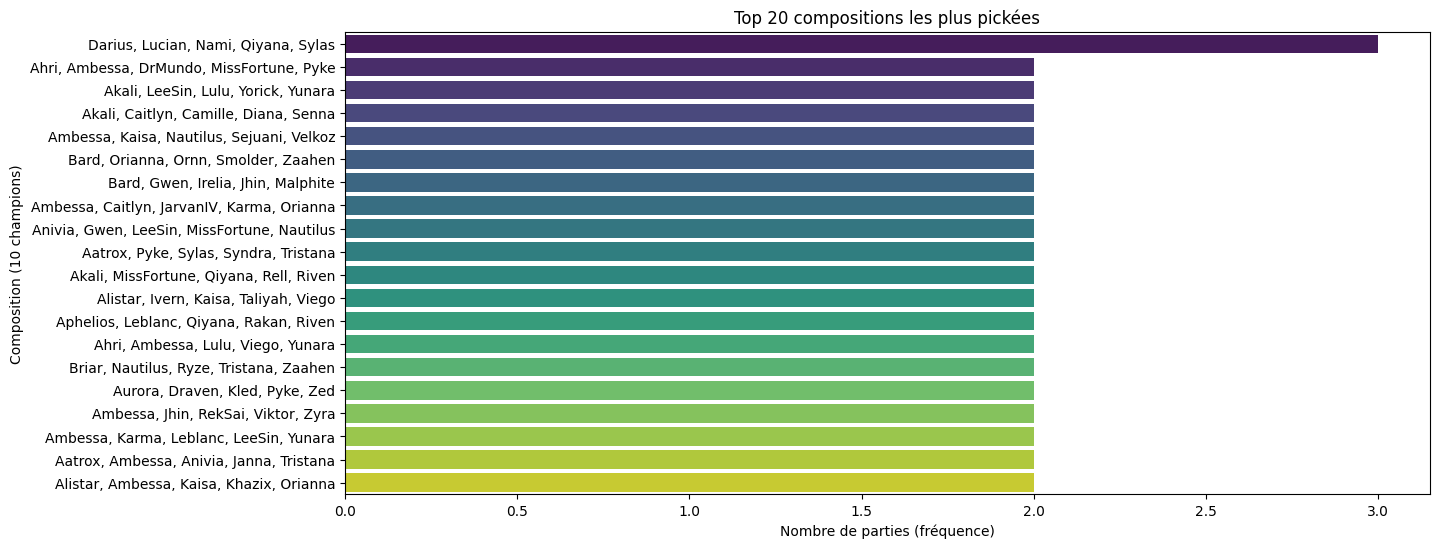

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier par count
top_compositions = DF_combine.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(
    data=top_compositions,
    x='count',
    y=top_compositions['composition'].apply(lambda x: ', '.join(x)),  # affiche champions
    orient='h',
    palette='viridis'
)

plt.xlabel("Nombre de parties (fréquence)")
plt.ylabel("Composition (10 champions)")
plt.title("Top 20 compositions les plus pickées")
plt.show()



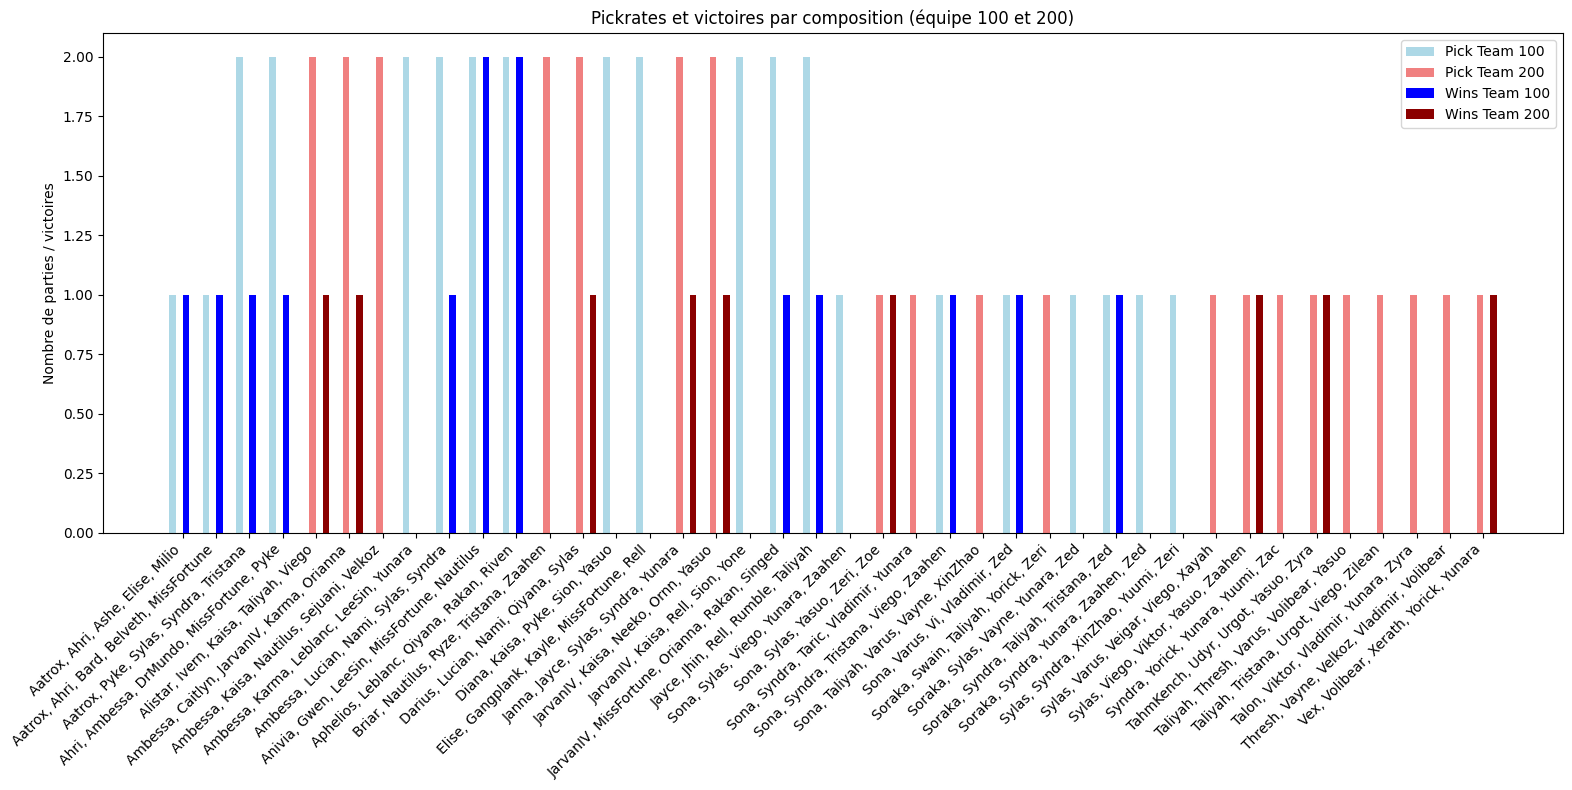

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# On prend les top 10 compositions de chaque équipe
top_comp_100 = DF_team_100.sort_values(by='count', ascending=False).head(20)
top_comp_200 = DF_team_200.sort_values(by='count', ascending=False).head(20)

# Renommer les colonnes pour faciliter le merge
top_comp_100_renamed = top_comp_100.rename(columns={'composition_team_100':'composition','count':'pick_100','wins':'wins_100'})
top_comp_200_renamed = top_comp_200.rename(columns={'composition_team_200':'composition','count':'pick_200','wins':'wins_200'})

# Merge via outer join sur 'composition'
top_compositions = pd.merge(top_comp_100_renamed[['composition','pick_100','wins_100']],
                            top_comp_200_renamed[['composition','pick_200','wins_200']],
                            on='composition', how='outer')

# Remplacer NaN par 0
top_compositions = top_compositions.fillna(0)

# Bar plot groupé
x = np.arange(len(top_compositions))
width = 0.2

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(x - 1.5*width, top_compositions['pick_100'], width, color='lightblue', label='Pick Team 100')
ax.bar(x - 0.5*width, top_compositions['pick_200'], width, color='lightcoral', label='Pick Team 200')
ax.bar(x + 0.5*width, top_compositions['wins_100'], width, color='blue', label='Wins Team 100')
ax.bar(x + 1.5*width, top_compositions['wins_200'], width, color='darkred', label='Wins Team 200')

# Labels
ax.set_xticks(x)
ax.set_xticklabels([', '.join(c) for c in top_compositions['composition']], rotation=45, ha='right')
ax.set_ylabel("Nombre de parties / victoires")
ax.set_title("Pickrates et victoires par composition (équipe 100 et 200)")
ax.legend()

plt.tight_layout()
plt.show()


In [46]:
# Extraire les compositions uniques jouées par chaque équipe
compo_100_all = set(df_reduced['composition_team_100'])
compo_200_all = set(df_reduced['composition_team_200'])

# Trouver les compositions jouées des deux côtés
compositions_both_sides = compo_100_all.intersection(compo_200_all)

print(f"Nombre de compositions jouées par les deux équipes : {len(compositions_both_sides)}\n")

for comp in sorted(compositions_both_sides):
    print(comp)


Nombre de compositions jouées par les deux équipes : 24

('Aatrox', 'Ambessa', 'Anivia', 'Janna', 'Tristana')
('Aatrox', 'Jinx', 'Leblanc', 'Milio', 'Shaco')
('Ahri', 'Ambessa', 'Lulu', 'Viego', 'Yunara')
('Akali', 'Caitlyn', 'Camille', 'Diana', 'Senna')
('Akali', 'LeeSin', 'Lulu', 'Yorick', 'Yunara')
('Akali', 'MissFortune', 'Qiyana', 'Rell', 'Riven')
('Alistar', 'Ambessa', 'Kaisa', 'Khazix', 'Orianna')
('Ambessa', 'Jhin', 'RekSai', 'Viktor', 'Zyra')
('Aurora', 'Draven', 'Kled', 'Pyke', 'Zed')
('Bard', 'Gwen', 'Irelia', 'Jhin', 'Malphite')
('Bard', 'Orianna', 'Ornn', 'Smolder', 'Zaahen')
('Blitzcrank', 'Cassiopeia', 'Mordekaiser', 'Shaco', 'Xayah')
('Caitlyn', 'Kayle', 'Nautilus', 'Qiyana', 'Xerath')
('Chogath', 'Katarina', 'Khazix', 'Renata', 'Twitch')
('Darius', 'Lucian', 'Nami', 'Qiyana', 'Sylas')
('Diana', 'Lucian', 'Rell', 'Yasuo', 'Yone')
('Ekko', 'Garen', 'Kaisa', 'Pyke', 'RekSai')
('Elise', 'Rakan', 'Viktor', 'Xayah', 'Zaahen')
('Hwei', 'Neeko', 'Renekton', 'Sylas', 'Yunara')


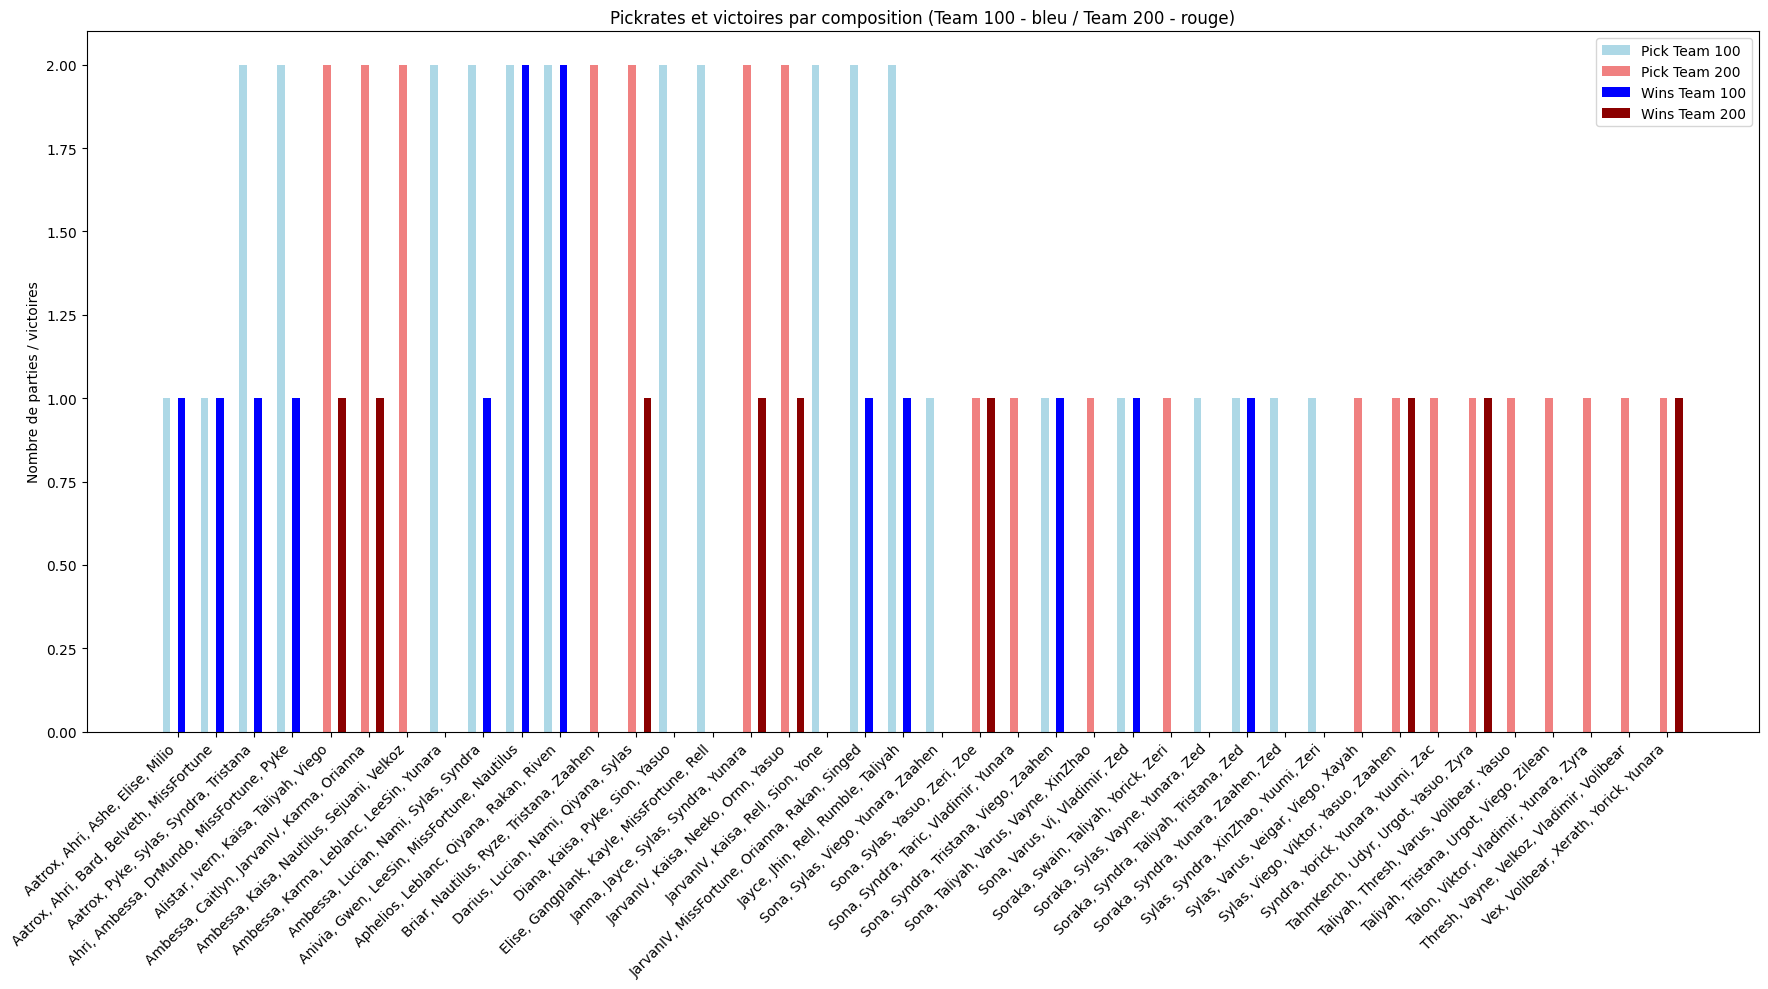

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# On prend les top 20 compositions de chaque équipe
top_comp_100 = DF_team_100.sort_values(by='count', ascending=False).head(20)
top_comp_200 = DF_team_200.sort_values(by='count', ascending=False).head(20)

# Renommer les colonnes pour faciliter le merge
top_comp_100_renamed = top_comp_100.rename(columns={
    'composition_team_100': 'composition',
    'count': 'pick_100',
    'wins': 'wins_100'
})

top_comp_200_renamed = top_comp_200.rename(columns={
    'composition_team_200': 'composition',
    'count': 'pick_200',
    'wins': 'wins_200'
})

# Merge via outer join
top_compositions = pd.merge(
    top_comp_100_renamed[['composition', 'pick_100', 'wins_100']],
    top_comp_200_renamed[['composition', 'pick_200', 'wins_200']],
    on='composition',
    how='outer'
).fillna(0)

# Bar plot groupé
x = np.arange(len(top_compositions))
width = 0.2

fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(x - 1.5*width, top_compositions['pick_100'], width,
       color='lightblue', label='Pick Team 100')

ax.bar(x - 0.5*width, top_compositions['pick_200'], width,
       color='lightcoral', label='Pick Team 200')

ax.bar(x + 0.5*width, top_compositions['wins_100'], width,
       color='blue', label='Wins Team 100')

ax.bar(x + 1.5*width, top_compositions['wins_200'], width,
       color='darkred', label='Wins Team 200')

# Labels lisibles
ax.set_xticks(x)
ax.set_xticklabels([', '.join(c) for c in top_compositions['composition']],
                   rotation=45, ha='right')

ax.set_ylabel("Nombre de parties / victoires")
ax.set_title("Pickrates et victoires par composition (Team 100 - bleu / Team 200 - rouge)")
ax.legend()

plt.tight_layout()
plt.show()


In [49]:
#                               composition_team_100  count  wins  winrate
# 0        (Aphelios, Leblanc, Qiyana, Rakan, Riven)      2     2      1.0
# 1          (Aatrox, Pyke, Sylas, Syndra, Tristana)      2     1      0.5
# 2           (Ambessa, Lucian, Nami, Sylas, Syndra)      2     1      0.5
# 3        (Ambessa, Karma, Leblanc, LeeSin, Yunara)      2     0      0.0
# 4    (Anivia, Gwen, LeeSin, MissFortune, Nautilus)      2     2      1.0
DF_combine.sort_values(by='count', ascending=False).head(40)
# DF_team_100.get()

composition  count  wins   winrate
23558                (Darius, Lucian, Nami, Qiyana, Sylas)      3     2  0.666667
2372           (Ahri, Ambessa, DrMundo, MissFortune, Pyke)      2     1  0.500000
5295                 (Akali, LeeSin, Lulu, Yorick, Yunara)      2     2  1.000000
4383               (Akali, Caitlyn, Camille, Diana, Senna)      2     1  0.500000
9413           (Ambessa, Kaisa, Nautilus, Sejuani, Velkoz)      2     0  0.000000
16889               (Bard, Orianna, Ornn, Smolder, Zaahen)      2     0  0.000000
16244                 (Bard, Gwen, Irelia, Jhin, Malphite)      2     1  0.500000
8360          (Ambessa, Caitlyn, JarvanIV, Karma, Orianna)      2     1  0.500000
10577        (Anivia, Gwen, LeeSin, MissFortune, Nautilus)      2     2  1.000000
2227               (Aatrox, Pyke, Sylas, Syndra, Tristana)      2     1  0.500000
5391             (Akali, MissFortune, Qiyana, Rell, Riven)      2     1  0.500000
7233               (Alistar, Ivern, Kaisa, Taliyah, Viego)      2     1  0.500000
11922            (Aphelios, Leblanc, Qiyana, Rakan, Riven)      2     2  1.000000
2419                  (Ahri, Ambessa, Lulu, Viego, Yunara)      2     1  0.500000
19478            (Briar, Nautilus, Ryze, Tristana, Zaahen)      2     0  0.000000
14269                    (Aurora, Draven, Kled, Pyke, Zed)      2     1  0.500000
9289                 (Ambessa, Jhin, RekSai, Viktor, Zyra)      2     2  1.000000
9456             (Ambessa, Karma, Leblanc, LeeSin, Yunara)      2     0  0.000000
326             (Aatrox, Ambessa, Anivia, Janna, Tristana)      2     1  0.500000
6406            (Alistar, Ambessa, Kaisa, Khazix, Orianna)      2     2  1.000000
17381  (Blitzcrank, Cassiopeia, Mordekaiser, Shaco, Xayah)      2     1  0.500000
9650                (Ambessa, Lucian, Nami, Sylas, Syndra)      2     1  0.500000
20377           (Caitlyn, Kayle, Nautilus, Qiyana, Xerath)      2     2  1.000000
22196          (Chogath, Katarina, Khazix, Renata, Twitch)      2     1  0.500000
1758                 (Aatrox, Jinx, Leblanc, Milio, Shaco)      2     2  1.000000
24293                    (Diana, Kaisa, Pyke, Sion, Yasuo)      2     0  0.000000
24404                   (Diana, Lucian, Rell, Yasuo, Yone)      2     1  0.500000
25958                   (Ekko, Garen, Kaisa, Pyke, RekSai)      2     0  0.000000
26722         (Elise, Gangplank, Kayle, MissFortune, Rell)      2     0  0.000000
27151                (Elise, Rakan, Viktor, Xayah, Zaahen)      2     0  0.000000
32086               (Hwei, Neeko, Renekton, Sylas, Yunara)      2     2  1.000000
32811                (Janna, Jayce, Sylas, Syndra, Yunara)      2     1  0.500000
33376                (JarvanIV, Kaisa, Neeko, Ornn, Yasuo)      2     1  0.500000
33395                  (JarvanIV, Kaisa, Rell, Sion, Yone)      2     0  0.000000
33580      (JarvanIV, MissFortune, Orianna, Rakan, Singed)      2     1  0.500000
34120                 (Jayce, Jhin, Rell, Rumble, Taliyah)      2     1  0.500000
34178            (Jayce, Kaisa, Nautilus, Orianna, Qiyana)      2     1  0.500000
34316                (Jayce, Lucian, Nami, Orianna, Sylas)      2     1  0.500000
36131             (Kaisa, Nautilus, Rumble, Syndra, Viego)      2     0  0.000000
37126    (Katarina, MissFortune, Nautilus, Qiyana, Zaahen)      2     1  0.500000

In [ ]:
top40 = DF_combine.sort_values(by="count", ascending=False).head(40)
compositions = top40["composition"].tolist()
DF_100_filtered = DF_team_100[DF_team_100["composition_team_100"].isin(compositions)]
DF_200_filtered = DF_team_200[DF_team_200["composition_team_200"].isin(compositions)]
counts_100 = (DF_100_filtered
              .groupby("composition_team_100")
              .size()
              .reset_index(name="count_100"))

counts_200 = (DF_200_filtered
              .groupby("composition_team_200")
              .size()
              .reset_index(name="count_200"))

top40 = DF_combine.sort_values(by="count", ascending=False).head(40)
compositions = top40["composition"].tolist()




# Filtrer
DF_100_filtered = DF_team_100[DF_team_100["composition_team_100"].isin(compositions)].copy()
DF_200_filtered = DF_team_200[DF_team_200["composition_team_200"].isin(compositions)].copy()

# Renommages pour uniformiser
DF_100_filtered = DF_100_filtered.rename(columns={"composition_team_100": "composition"})
DF_200_filtered = DF_200_filtered.rename(columns={"composition_team_200": "composition"})

# Comptages
counts_100 = (
    DF_100_filtered
    .groupby("composition")
    .size()
    .reset_index(name="count_100")
)

counts_200 = (
    DF_200_filtered
    .groupby("composition")
    .size()
    .reset_index(name="count_200")
)

# Merge avec top40
df_hist = (
    top40
    .merge(counts_100, on="composition", how="left")
    .merge(counts_200, on="composition", how="left")
)

df_hist = df_hist.fillna(0)





df_hist = top40.merge(counts_100, on="composition_team_100", how="left") \
               .merge(counts_200, on="composition_team_100", how="left")

df_hist = df_hist.fillna(0)   # si certaines compositions n'ont pas été jouées d'un côté




KeyError: 'composition_team_100'